# Creación de un modelo desde cero: nueva arquitectura y reducción de "ruido"

## Librerías necesarias

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

## Variables globales del sistema

In [4]:
original_dir = pathlib.Path("ExpandedDataset/")
new_base_dir = pathlib.Path("ExpandedDataset_organized/")
content = os.listdir(original_dir)
BATCH_SIZE = 64
size_x = 256
size_y = 256

## Creación de los datasets específicos a partir de las carpetas 

In [15]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(size_x, size_y),
    batch_size=BATCH_SIZE,
    label_mode='categorical')

Found 9280 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.
Found 1160 files belonging to 58 classes.


## Nuevo modelo más profundo: el modelo tres

In [13]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3 = keras.Model(inputs=inputs, outputs=outputs)

model3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 60, 60, 64)        1849

## Entrenamiento y guardado de resultados del modelo tres

In [16]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model3/best_version",
 save_best_only=True,
 monitor="val_loss")
]

model3.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model3.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 44s 127ms/step - loss: 4.1367 - accuracy: 0.0167 - val_loss: 4.0243 - val_accuracy: 0.0172
INFO:tensorflow:Assets written to: model3\best_version\assets
Epoch 2/30
145/145 [==============================] - 18s 116ms/step - loss: 3.8844 - accuracy: 0.0400 - val_loss: 3.5098 - val_accuracy: 0.0621
INFO:tensorflow:Assets written to: model3\best_version\assets
Epoch 3/30
145/145 [==============================] - 18s 116ms/step - loss: 3.5740 - accuracy: 0.0795 - val_loss: 3.2888 - val_accuracy: 0.1112
INFO:tensorflow:Assets written to: model3\best_version\assets
Epoch 4/30
145/145 [==============================] - 18s 116ms/step - loss: 3.1833 - accuracy: 0.1426 - val_loss: 3.0713 - val_accuracy: 0.1414
INFO:tensorflow:Assets written to: model3\best_version\assets
Epoch 5/30
145/145 [==============================] - 18s 117ms/step - loss: 2.8795 - accuracy: 0.2053 - val_loss: 3.1766 - val_accuracy: 0.1233
Epoch 6/30
145/145 [=======

In [17]:
model3.save('model3/model')
np.save('model3/history.npy',history.history)

INFO:tensorflow:Assets written to: model3/model\assets


## Análisis de resultados

In [18]:
my_history1=np.load('model2/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3/history.npy',allow_pickle='TRUE').item()

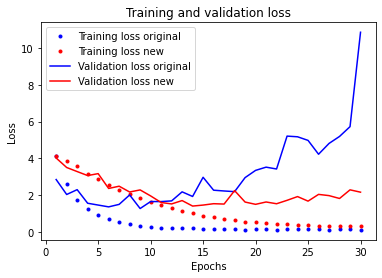

In [19]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

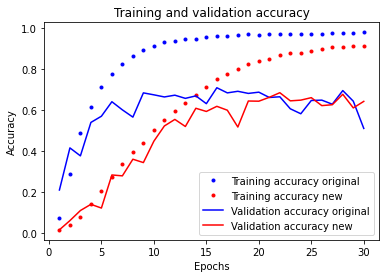

In [20]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [21]:
model = keras.models.load_model('model3/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 64ms/step - loss: 2.0408 - accuracy: 0.6388


[2.040764093399048, 0.6387931108474731]

In [22]:
model = keras.models.load_model('model3/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 73ms/step - loss: 1.3558 - accuracy: 0.5845


[1.355833888053894, 0.584482729434967]

## Modelo 3.1: modelo tres con tres capas densas al final

In [27]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_1 = keras.Model(inputs=inputs, outputs=outputs)

model3_1.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
rescaling_10 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 60, 60, 64)        1849

In [28]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="model3_1/best_version",
 save_best_only=True,
 monitor="val_loss")
]

model3_1.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model3_1.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

Epoch 1/30
145/145 [==============================] - 22s 131ms/step - loss: 4.0648 - accuracy: 0.0152 - val_loss: 4.0605 - val_accuracy: 0.0172
INFO:tensorflow:Assets written to: model3_1\best_version\assets
Epoch 2/30
145/145 [==============================] - 19s 124ms/step - loss: 4.0709 - accuracy: 0.0136 - val_loss: 4.0584 - val_accuracy: 0.0216
INFO:tensorflow:Assets written to: model3_1\best_version\assets
Epoch 3/30
145/145 [==============================] - 18s 120ms/step - loss: 3.7601 - accuracy: 0.0428 - val_loss: 3.7383 - val_accuracy: 0.0431
INFO:tensorflow:Assets written to: model3_1\best_version\assets
Epoch 4/30
145/145 [==============================] - 19s 122ms/step - loss: 3.3819 - accuracy: 0.0980 - val_loss: 3.2081 - val_accuracy: 0.1241
INFO:tensorflow:Assets written to: model3_1\best_version\assets
Epoch 5/30
145/145 [==============================] - 19s 123ms/step - loss: 3.0447 - accuracy: 0.1638 - val_loss: 2.7581 - val_accuracy: 0.2034
INFO:tensorflow:Ass

In [29]:
model3_1.save('model3_1/model')
np.save('model3_1/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_1/model\assets


In [30]:
my_history1=np.load('model3/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_1/history.npy',allow_pickle='TRUE').item()

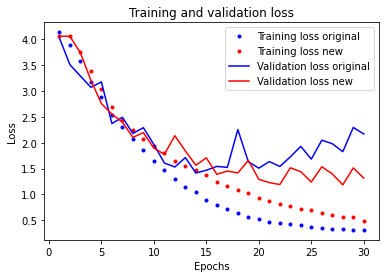

In [31]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

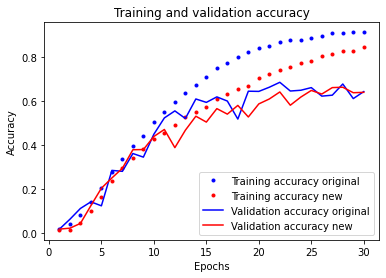

In [32]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
model = keras.models.load_model('model3_1/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 73ms/step - loss: 1.4890 - accuracy: 0.6345


[1.4890308380126953, 0.634482741355896]

In [34]:
model = keras.models.load_model('model3_1/best_version')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 2s 73ms/step - loss: 1.4009 - accuracy: 0.6578


[1.4009233713150024, 0.6577585935592651]

## Modelo 3.2: modelo tres con capas densas y conexiones residuales

In [41]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
residual = x 
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
residual = layers.Conv2D(256, 1, strides=2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_2 = keras.Model(inputs=inputs, outputs=outputs)

model3_2.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_16 (Rescaling)        (None, 256, 256, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_144 (Conv2D)             (None, 254, 254, 16) 448         rescaling_16[0][0]               
__________________________________________________________________________________________________
max_pooling2d_65 (MaxPooling2D) (None, 127, 127, 16) 0           conv2d_144[0][0]                 
___________________________________________________________________________________________

In [42]:
model3_2.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model3_2.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset)

Epoch 1/30
145/145 [==============================] - 26s 154ms/step - loss: 4.1099 - accuracy: 0.0162 - val_loss: 4.0441 - val_accuracy: 0.0319
Epoch 2/30
145/145 [==============================] - 23s 152ms/step - loss: 4.0354 - accuracy: 0.0283 - val_loss: 4.0847 - val_accuracy: 0.0448
Epoch 3/30
145/145 [==============================] - 22s 149ms/step - loss: 3.6022 - accuracy: 0.0942 - val_loss: 3.2191 - val_accuracy: 0.1431
Epoch 4/30
145/145 [==============================] - 23s 154ms/step - loss: 3.0537 - accuracy: 0.1870 - val_loss: 2.9667 - val_accuracy: 0.2009
Epoch 5/30
145/145 [==============================] - 22s 147ms/step - loss: 2.6112 - accuracy: 0.2702 - val_loss: 2.4540 - val_accuracy: 0.2888
Epoch 6/30
145/145 [==============================] - 22s 147ms/step - loss: 2.2968 - accuracy: 0.3358 - val_loss: 2.3567 - val_accuracy: 0.3147
Epoch 7/30
145/145 [==============================] - 22s 149ms/step - loss: 2.0405 - accuracy: 0.3928 - val_loss: 1.9513 - val_ac

In [43]:
model3_2.save('model3_2/model')
np.save('model3_2/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_2/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [44]:
my_history1=np.load('model3_1/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_2/history.npy',allow_pickle='TRUE').item()

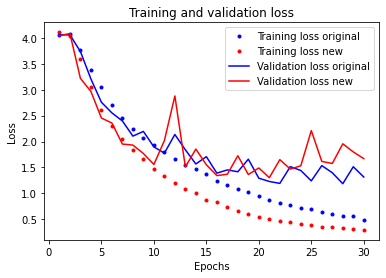

In [45]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

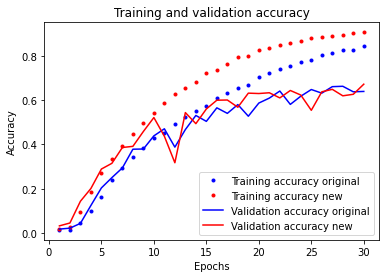

In [46]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
model = keras.models.load_model('model3_2/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 76ms/step - loss: 1.7564 - accuracy: 0.6466


[1.75640869140625, 0.6465517282485962]

## Modelo 3.3: modelo tres con capas densas y más conexiones residuales

In [54]:
inputs = keras.Input(shape=(size_x, size_y, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
residual = x
x = layers.MaxPooling2D(pool_size=2, padding = "same")(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")(x)
residual = layers.Conv2D(64, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
residual = x
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu",  padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
residual = layers.Conv2D(128, 1, strides = 2)(residual)
x = layers.add([x, residual])
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
residual = x 
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
residual = layers.Conv2D(256, 1)(residual)
x = layers.add([x, residual])
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Dense(64, activation = "relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(58, activation="softmax")(x)
model3_3 = keras.Model(inputs=inputs, outputs=outputs)

model3_3.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_22 (Rescaling)        (None, 256, 256, 3)  0           input_23[0][0]                   
__________________________________________________________________________________________________
conv2d_199 (Conv2D)             (None, 254, 254, 16) 448         rescaling_22[0][0]               
__________________________________________________________________________________________________
max_pooling2d_91 (MaxPooling2D) (None, 127, 127, 16) 0           conv2d_199[0][0]                 
___________________________________________________________________________________________

In [55]:
model3_3.compile(loss="categorical_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

history = model3_3.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset)

Epoch 1/30
145/145 [==============================] - 26s 158ms/step - loss: 4.0780 - accuracy: 0.0176 - val_loss: 4.0421 - val_accuracy: 0.0103
Epoch 2/30
145/145 [==============================] - 24s 156ms/step - loss: 3.8446 - accuracy: 0.0556 - val_loss: 3.7110 - val_accuracy: 0.0672
Epoch 3/30
145/145 [==============================] - 25s 165ms/step - loss: 3.1893 - accuracy: 0.1543 - val_loss: 2.9338 - val_accuracy: 0.2017
Epoch 4/30
145/145 [==============================] - 24s 157ms/step - loss: 2.7200 - accuracy: 0.2421 - val_loss: 2.6731 - val_accuracy: 0.2586
Epoch 5/30
145/145 [==============================] - 23s 155ms/step - loss: 2.3975 - accuracy: 0.3140 - val_loss: 2.3023 - val_accuracy: 0.3216
Epoch 6/30
145/145 [==============================] - 23s 156ms/step - loss: 2.1214 - accuracy: 0.3873 - val_loss: 2.4032 - val_accuracy: 0.3164
Epoch 7/30
145/145 [==============================] - 23s 156ms/step - loss: 1.8713 - accuracy: 0.4423 - val_loss: 3.0064 - val_ac

In [56]:
model3_3.save('model3_3/model')
np.save('model3_3/history.npy',history.history)

INFO:tensorflow:Assets written to: model3_3/model\assets


F:\Programas\Anaconda\envs\TFGapp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [57]:
my_history1=np.load('model3_2/history.npy',allow_pickle='TRUE').item()
my_history2=np.load('model3_3/history.npy',allow_pickle='TRUE').item()

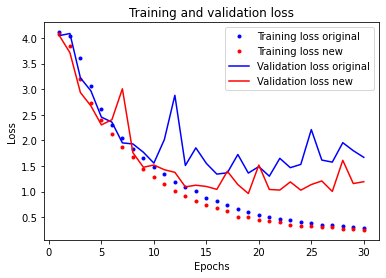

In [58]:
loss_1 = my_history1["loss"]
val_loss_1 = my_history1["val_loss"]
loss_2 = my_history2["loss"]
val_loss_2 = my_history2["val_loss"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, loss_1, "b.", label="Training loss original")
plt.plot(epochs, loss_2, "r.", label="Training loss new")
plt.plot(epochs, val_loss_1, "b", label="Validation loss original")
plt.plot(epochs, val_loss_2, "r", label="Validation loss new")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

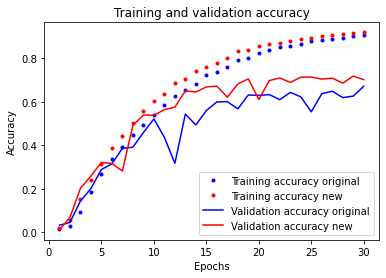

In [59]:

plt.clf()

acc_1 = my_history1["accuracy"]
val_acc_1 = my_history1["val_accuracy"]
acc_2 = my_history2["accuracy"]
val_acc_2 = my_history2["val_accuracy"]
epochs = range(1, len(loss_1) + 1)

plt.plot(epochs, acc_1, "b.", label="Training accuracy original")
plt.plot(epochs, acc_2, "r.", label="Training accuracy new")
plt.plot(epochs, val_acc_1, "b", label="Validation accuracy original")
plt.plot(epochs, val_acc_2, "r", label="Validation accuracy new")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
model = keras.models.load_model('model3_3/model')
results= model.evaluate(test_dataset)
results

19/19 [==============================] - 3s 78ms/step - loss: 1.1992 - accuracy: 0.7233


[1.199243426322937, 0.7232758402824402]